In [52]:
import datetime

import pandas as pd
import vectorbt as vbt
from indicators import DeMarkerOscillator

In [18]:
start_time = datetime.datetime(2020, 1, 1)
end_time = datetime.datetime(2021, 9, 1)
df = vbt.CCXTData.download_symbol("BTCUSDT", start=start_time, end=end_time, timeframe="2h")

0it [00:00, ?it/s]

In [19]:
dem = DeMarkerOscillator.run(high=df['High'], low=df['Low'], period=13)
df["DeM"] = dem.dem
df

Open      High       Low     Close  \
Open time                                                           
2019-12-31 22:00:00+00:00   7185.92   7208.41   7181.78   7195.23   
2020-01-01 00:00:00+00:00   7195.24   7230.00   7175.46   7216.27   
2020-01-01 02:00:00+00:00   7215.52   7245.00   7211.41   7225.01   
2020-01-01 04:00:00+00:00   7225.00   7230.00   7215.03   7224.21   
2020-01-01 06:00:00+00:00   7224.24   7236.27   7199.11   7209.83   
...                             ...       ...       ...       ...   
2021-08-31 12:00:00+00:00  47969.51  48150.00  47651.80  47873.37   
2021-08-31 14:00:00+00:00  47873.37  48246.11  47180.00  47397.13   
2021-08-31 16:00:00+00:00  47397.13  47568.85  47001.00  47100.99   
2021-08-31 18:00:00+00:00  47101.00  47400.00  47024.70  47300.01   
2021-08-31 20:00:00+00:00  47300.00  47322.71  46833.00  46911.50   

                                Volume       DeM  
Open time                                         
2019-12-31 22:00:00+00:00  1173.139474       NaN  
2020-01-01 00:00:00+00:00  1394.867504       NaN  
2020-01-01 02:00:00+00:00  1438.881676       NaN  
2020-01-01 04:00:00+00:00   812.483174       NaN  
2020-01-01 06:00:00+00:00  1248.811877       NaN  
...                                ...       ...  
2021-08-31 12:00:00+00:00  4146.842750  0.458113  
2021-08-31 14:00:00+00:00  6177.430280  0.446426  
2021-08-31 16:00:00+00:00  4230.776090  0.404296  
2021-08-31 18:00:00+00:00  2636.119070  0.367941  
2021-08-31 20:00:00+00:00  2863.654040  0.303303  

[7299 rows x 6 columns]

In [ ]:
fig = df.vbt.ohlcv.plots(
    settings=dict(plot_type='candlestick')
).show()
df['DeM']\
    .vbt.plot().add_hline(y=0.7).add_hline(y=0.3).show()



In [21]:
entries = dem.dem_above(0.3, crossover=True)
exits = dem.dem_below(0.7, crossover=True)
short_entries = dem.dem_below(0.7, crossover=True)
short_exits = dem.dem_above(0.3, crossover=True)

In [26]:
vbt.settings.portfolio.init_cash = 1000
vbt.settings.portfolio.fees = 0.0025
pf = vbt.Portfolio.from_signals(df['Close'],
                                direction='both',
                                entries=entries,
                                exits=exits,
                                freq='2h'
                                # short_entries=short_entries,
                                # short_exits=short_exits,
                                # tp_stop=0.035,
                                # sl_trail=0.1
                                )
print(pf.init_cash + pf.total_profit())
pf.plot().show()

212.49189246437697


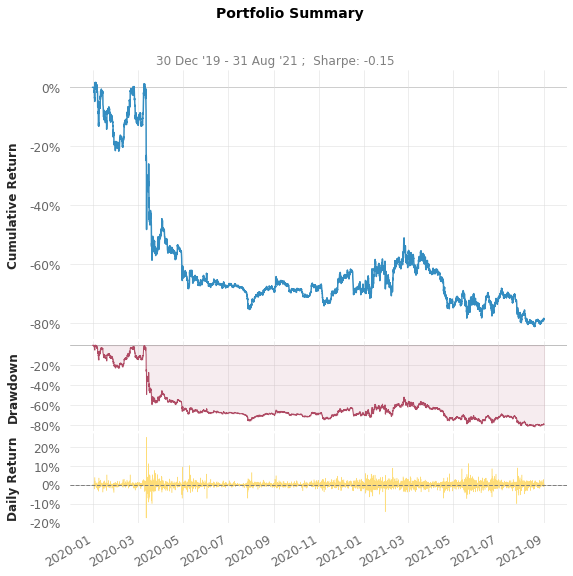

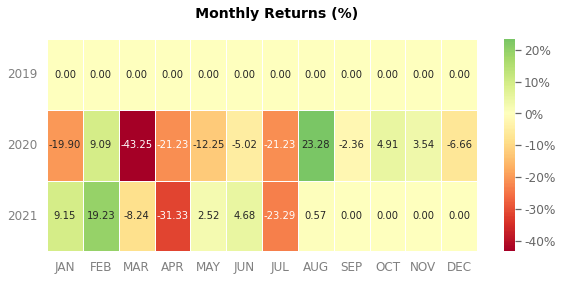

In [27]:
pf.qs.plots_report()

In [ ]:
pf.qs.plot_log_returns()

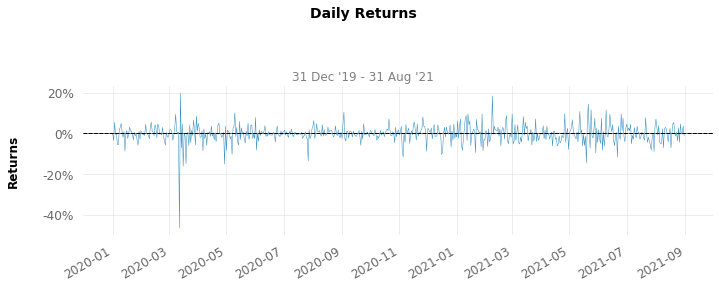

In [37]:
pf.qs.plot_daily_returns()
